(1080, 1920, 3)
1080.0


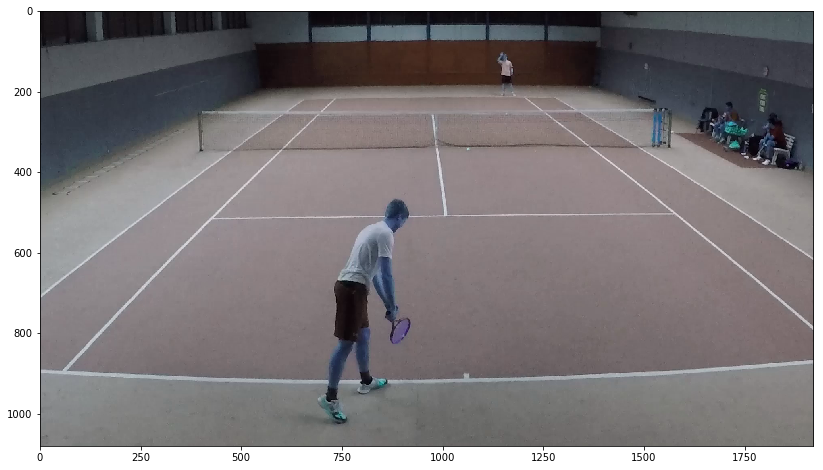

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('/home/mueller/code/python/Anwendungspraktikum/Videos/GoPro/GoProFrames/image_GP_00001.png')
h,w = img.shape[:2]
print(img.shape)
# check is 16:9 or 4:3 format was used
print(img.shape[1]/16 * 9)
plt.figure(figsize=(24,8))
plt.imshow(img)
plt.show()

In [8]:
imgpoints = np.array([[]]).reshape(0,2)
objpoints = np.array([[]]).reshape(0,3)
with open('/home/mueller/code/python/Anwendungspraktikum/cvtennis/code/Kalibrierung.txt') as f:
    for i,row in enumerate(f):
        imgp, objp = row.split(';')
        imgp = [float(x.strip(' ))\n(')) for x in imgp.split(',')] 
        objp = [float(x.strip(' ))\n(')) for x in objp.split(',')]
        print(i, imgp, objp)
        imgpoints = np.append(imgpoints, [imgp], axis=0)
        objpoints = np.append(objpoints, [objp], axis=0)
imgpoints = np.array(imgpoints)
imgpoints = imgpoints.astype('float32')
objpoints = np.array(objpoints)
objpoints = objpoints.astype('float32')

0 [60.0, 899.0] [1.37, 0.0, 0.0]
1 [1061.0, 921.0] [5.485, 0.0, 0.0]
2 [429.0, 516.0] [1.37, 0.0, 5.48]
3 [1007.0, 509.0] [5.485, 0.0, 5.48]
4 [1577.0, 505.0] [9.6, 0.0, 5.48]
5 [479.0, 346.0] [0.0, 0.0, 11.88]
6 [603.0, 344.0] [1.37, 0.0, 11.88]
7 [985.0, 339.0] [5.486, 0.0, 11.88]
8 [1365.0, 336.0] [9.6, 0.0, 11.88]
9 [1487.0, 338.0] [10.97, 0.0, 11.88]
10 [690.0, 260.0] [1.37, 0.0, 18.28]
11 [975.0, 255.0] [5.486, 0.0, 18.28]
12 [1259.0, 258.0] [9.6, 0.0, 18.28]
13 [656.0, 220.0] [0.0, 0.0, 23.77]
14 [734.0, 218.0] [1.37, 0.0, 23.77]
15 [968.0, 215.0] [5.486, 0.0, 23.77]
16 [1204.0, 216.0] [9.6, 0.0, 23.77]
17 [1279.0, 216.0] [10.97, 0.0, 23.77]


In [12]:
#Initial intrinsic matrix
F = 14 #Brennweite in mm
fx = 1#F/0.027 #69.5
fy = 1#F/0.027#F/#118.2
cx = w / 2
cy = h / 2
cameraMatrix = np.zeros((3,3))
cameraMatrix[0,:] = [fx, 0, cx]
cameraMatrix[1,:] = [0, fy, cy]
cameraMatrix[2,2] = 1
cameraMatrix = cameraMatrix.astype('float32')
print(cameraMatrix)

[[   1.    0.  960.]
 [   0.    1.  540.]
 [   0.    0.    1.]]


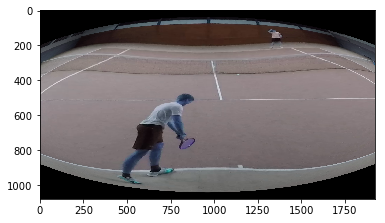

In [13]:
Parameters = np.zeros(5)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera([objpoints], [imgpoints], img.shape[0:2], cameraMatrix, 
                                                   distCoeffs=Parameters, flags=cv2.CALIB_USE_INTRINSIC_GUESS)
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))
# undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
plt.imshow(dst)
plt.show()

(1080, 1920, 3)
1080.0
0 [60.0, 899.0] [1.37, 0.0, 0.0]
1 [1061.0, 921.0] [5.485, 0.0, 0.0]
2 [429.0, 516.0] [1.37, 5.48, 0.0]
3 [1007.0, 509.0] [5.485, 5.48, 0.0]
4 [1577.0, 505.0] [9.6, 5.48, 0.0]
5 [479.0, 346.0] [0.0, 11.88, 0.0]
6 [603.0, 344.0] [1.37, 11.88, 0.0]
7 [985.0, 339.0] [5.486, 11.88, 0.0]
8 [1365.0, 336.0] [9.6, 11.88, 0.0]
9 [1487.0, 338.0] [10.97, 11.88, 0.0]
10 [690.0, 260.0] [1.37, 18.28, 0.0]
11 [734.0, 218.0] [1.37, 23.77, 0.0]
12 [968.0, 215.0] [5.486, 23.77, 0.0]
13 [1204.0, 216.0] [9.6, 23.77, 0.0]


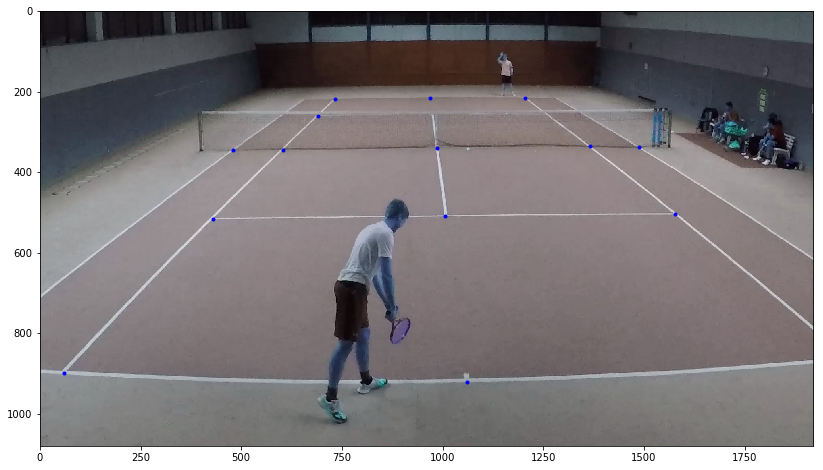

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('/home/mueller/code/python/Anwendungspraktikum/Videos/GoPro/GoProFrames/image_GP_00001.png')
h,w = img.shape[:2]
print(img.shape)
# check is 16:9 or 4:3 format was used
print(img.shape[1]/16 * 9)
#plt.figure(figsize=(16,8))
#plt.imshow(img)
#plt.show()

# Using planar Kalibration
imgpoints = np.array([[]]).reshape(0,2)
objpoints = np.array([[]]).reshape(0,3)
with open('/home/mueller/code/python/Anwendungspraktikum/cvtennis/code/Kalibrierung_planar.txt') as f:
    for i,row in enumerate(f):
        imgp, objp = row.split(';')
        imgp = [float(x.strip('))\n(')) for x in imgp.split(',')] 
        objp = [float(x.strip('))\n(')) for x in objp.split(',')]
        print(i, imgp, objp)
        imgpoints = np.append(imgpoints, [imgp], axis=0)
        objpoints = np.append(objpoints, [objp], axis=0)
imgpoints = np.array(imgpoints)
imgpoints = imgpoints.astype('float32')
objpoints = np.array(objpoints)
objpoints = objpoints.astype('float32')

plt.figure(figsize=(16,8))
plt.imshow(img)
plt.plot(imgpoints[14:,0], imgpoints[14:,1], 'r.')
plt.plot(imgpoints[0:14,0], imgpoints[0:14,1], 'b.')
plt.show()

In [2]:
Parameters = np.zeros(5)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera([objpoints], [imgpoints], img.shape[0:2], 
                                                   None, distCoeffs=Parameters)
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

In [10]:
%%timeit
Parameters = np.zeros(5)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera([objpoints], [imgpoints], img.shape[0:2], 
                                                   None, distCoeffs=Parameters)
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

147 ms ± 7.4 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [11]:
%%timeit
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

155 ms ± 57.7 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
plt.figure(figsize=(19,8))
plt.imshow(dst)
plt.show()